# Multiple Maps and Data-classification

-  Create grids of maps via ``MapsGrid``
-  | Classify your data via ``m.set_classify_specs(scheme, **kwargs)``
   | (using classifiers provided by the ``mapclassify`` module)
-  | Add individual callback functions to each subplot via
   | ``m.cb.click.attach``, ``m.cb.pick.attach``
-  | Share events between Maps-objects of the MapsGrid via
   | ``mg.share_click_events()`` and ``mg.share_pick_events()``

![image](../../../_static/example_images/example_multiple_maps.gif)

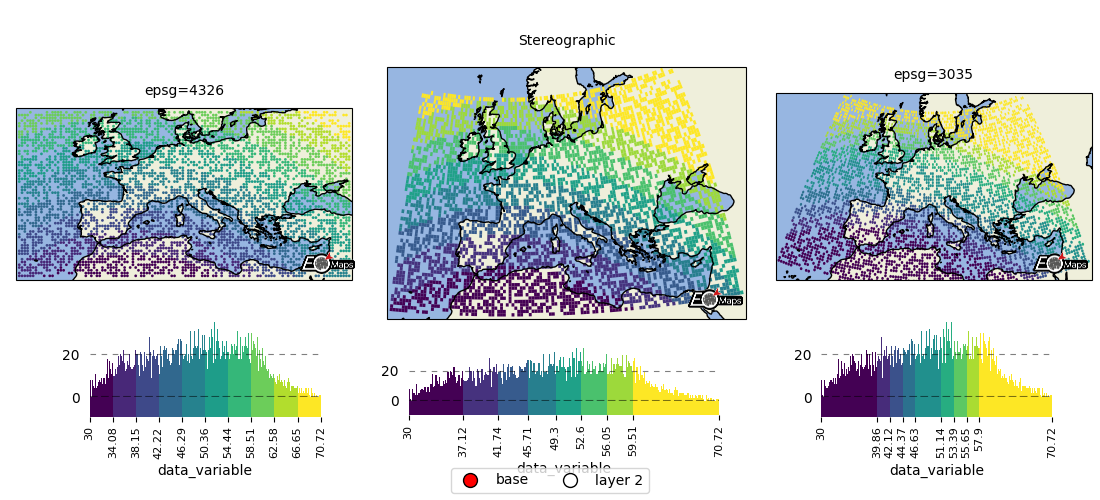

In [1]:
# EOmaps example: Data-classification and multiple Maps in one figure

from eomaps import Maps
import pandas as pd
import numpy as np

# ----------- create some example-data
lon, lat = np.meshgrid(np.arange(-20, 40, 0.5), np.arange(30, 60, 0.5))
data = pd.DataFrame(
    dict(lon=lon.flat, lat=lat.flat, data_variable=np.sqrt(lon**2 + lat**2).flat)
)
data = data.sample(4000)  # take 4000 random datapoints from the dataset
# ------------------------------------

# initialize a grid of Maps objects
m = Maps(ax=131, crs=4326, figsize=(11, 5))
m2 = m.new_map(ax=132, crs=Maps.CRS.Stereographic())
m3 = m.new_map(ax=133, crs=3035)

# --------- set specs for the first map
m.text(0.5, 1.1, "epsg=4326", transform=m.ax.transAxes)
m.set_classify_specs(scheme="EqualInterval", k=10)

# --------- set specs for the second map
m2.text(0.5, 1.1, "Stereographic", transform=m2.ax.transAxes)
m2.set_shape.rectangles()
m2.set_classify_specs(scheme="Quantiles", k=8)

# --------- set specs for the third map
m3.text(0.5, 1.1, "epsg=3035", transform=m3.ax.transAxes)
m3.set_classify_specs(
    scheme="StdMean",
    multiples=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
)

# --------- plot all maps and add colorbars to all maps
# set the data on ALL maps-objects of the grid
for m_i in [m, m2, m3]:
    m_i.set_data(data=data, x="lon", y="lat", crs=4326)
    m_i.plot_map()
    m_i.add_colorbar(extend="neither")

    m_i.add_feature.preset.ocean()
    m_i.add_feature.preset.land()
    # add the coastline to all layers of the maps
    m_i.add_feature.preset.coastline(layer="all")


# --------- add a new layer for the second axis
# NOTE: this layer is not visible by default but it can be shown by clicking
# on the layer-switcher utility buttons (bottom center of the figure)
# or by using `m2.show()`   or via  `m.show_layer("layer 2")`
m21 = m2.new_layer(layer="layer 2")
m21.inherit_data(m2)
m21.set_shape.delaunay_triangulation(mask_radius=0.5)
m21.set_classify_specs(scheme="Quantiles", k=4)
m21.plot_map(cmap="RdYlBu")
m21.add_colorbar(extend="neither")
# add an annotation that is only executed if "layer 2" is active
m21.cb.click.attach.annotate(text="callbacks are layer-sensitive!")

# --------- add some callbacks to indicate the clicked data-point to all maps
for m_i in [m, m2, m3]:
    m_i.cb.pick.attach.mark(fc="r", ec="none", buffer=1, permanent=True)
    m_i.cb.pick.attach.mark(fc="none", ec="r", lw=1, buffer=5, permanent=True)
    m_i.cb.move.attach.mark(fc="none", ec="k", lw=2, buffer=10, permanent=False)

for m_i in [m, m2, m21, m3]:
    # --------- rotate the ticks of the colorbars
    m_i.colorbar.ax_cb.tick_params(rotation=90, labelsize=8)
    # add logos
    m_i.add_logo(size=0.05)

# add an annotation-callback to the second map
m2.cb.pick.attach.annotate(text="the closest point is here!", zorder=99)

# share click & pick-events between all Maps-objects of the MapsGrid
m.cb.move.share_events(m2, m3)
m.cb.pick.share_events(m2, m3)

# --------- add a layer-selector widget
m.util.layer_selector(ncol=2, loc="lower center", draggable=False)


m.apply_layout(
    {
        "figsize": [11.0, 5.0],
        "0_map": [0.015, 0.44, 0.3125, 0.34375],
        "1_map": [0.35151, 0.363, 0.32698, 0.50973],
        "2_map": [0.705, 0.44, 0.2875, 0.37872],
        "3_cb": [0.05522, 0.0825, 0.2625, 0.2805],
        "3_cb_histogram_size": 0.8,
        "4_cb": [0.33625, 0.11, 0.3525, 0.2],
        "4_cb_histogram_size": 0.8,
        "5_cb": [0.72022, 0.0825, 0.2625, 0.2805],
        "5_cb_histogram_size": 0.8,
        "6_logo": [0.2725, 0.451, 0.05, 0.04538],
        "7_logo": [0.625, 0.3795, 0.05, 0.04538],
        "8_logo": [0.625, 0.3795, 0.05, 0.04538],
        "9_logo": [0.93864, 0.451, 0.05, 0.04538],
    }
)
m.show()